In [1]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8,5)

# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")
df.to_csv("/content/titanic.csv", index=False)

# Quick sanity checks
display(df.head(10))
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values per column:
deck           688
age     

In [2]:
# 1. Drop 'deck' because it's mostly missing
df = df.drop(columns=['deck'])

# 2. Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# 3. Fill embarked & embark_town with mode (most common)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# 4. Check again
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


/tmp/ipython-input-3393452839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


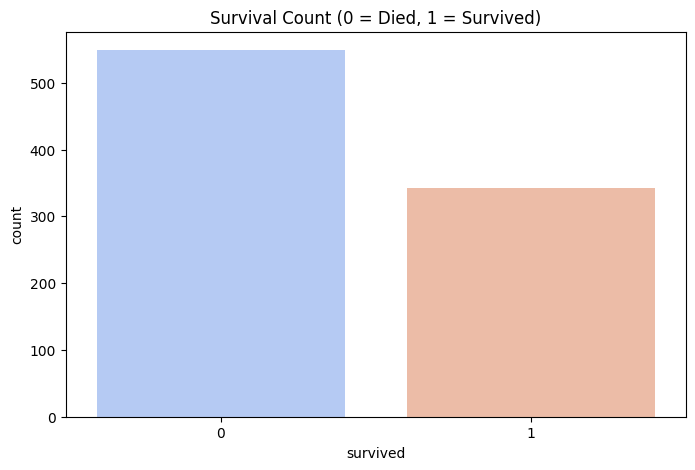

In [4]:

# 1- Survival Count (Target variable)
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

/tmp/ipython-input-59154664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


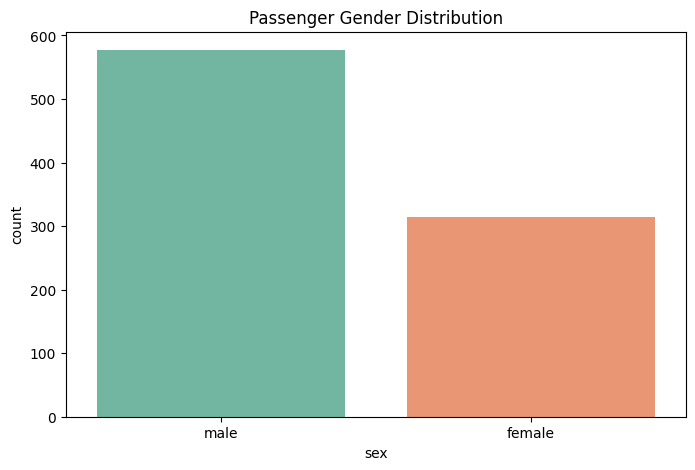

In [5]:
# 2- Gender Distribution
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Passenger Gender Distribution')
plt.show()

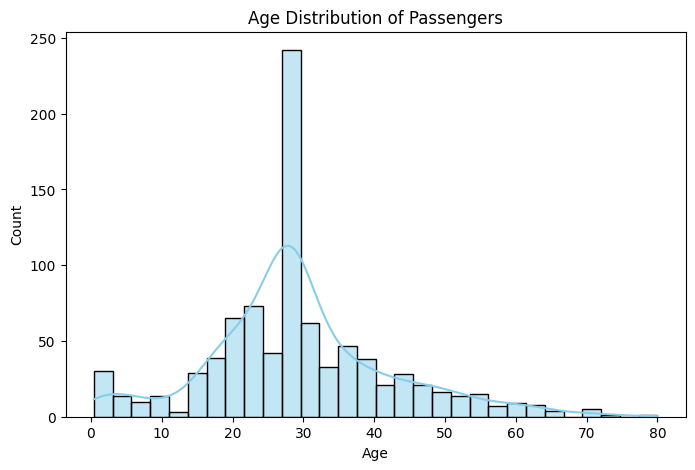

In [6]:
# 3- Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-127072836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='viridis')


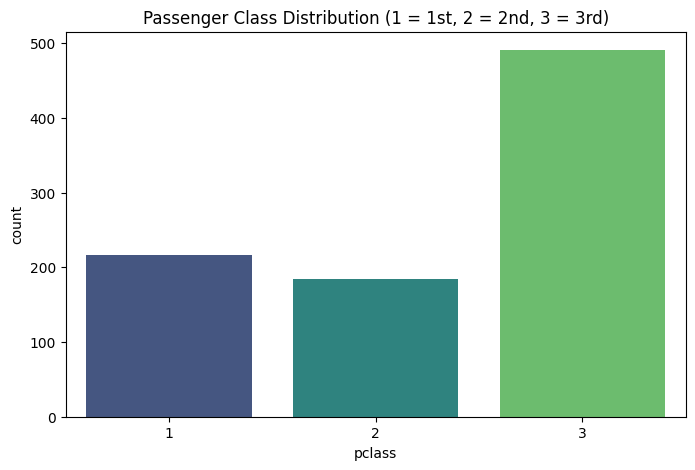

In [7]:
# 4- Passenger Class
sns.countplot(x='pclass', data=df, palette='viridis')
plt.title('Passenger Class Distribution (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()

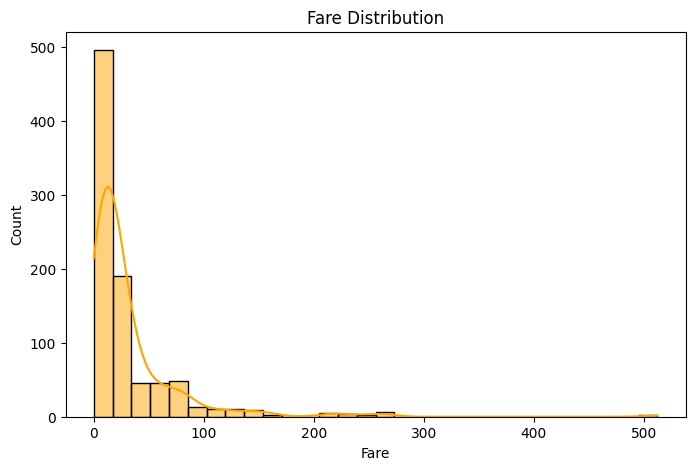

In [8]:
# 5- Fare Distribution
sns.histplot(df['fare'], bins=30, kde=True, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

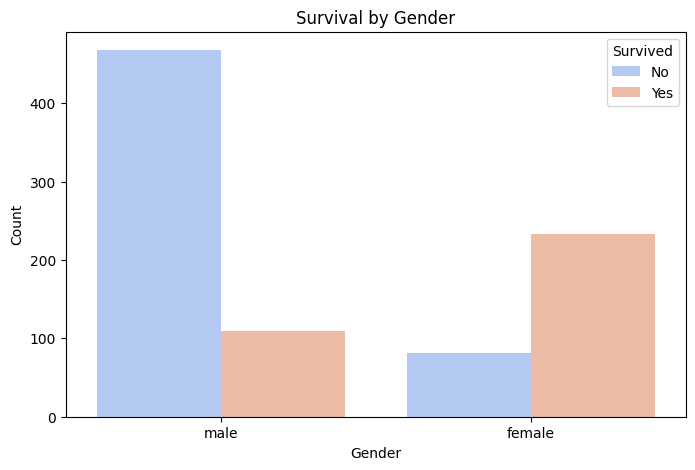

In [9]:
# 1. Survival by Gender
sns.countplot(x='sex', hue='survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

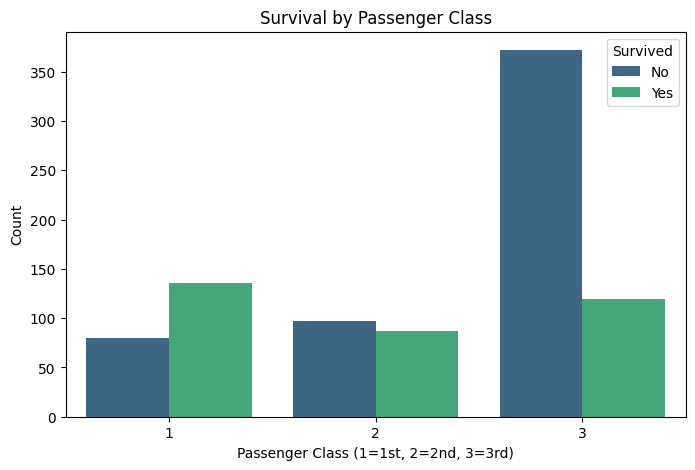

In [10]:
# 2. Survival by Passenger Class
sns.countplot(x='pclass', hue='survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

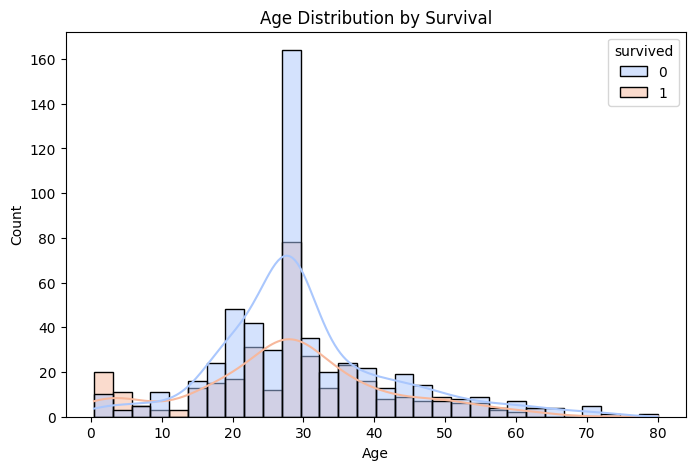

In [11]:
# 3. Age vs Survival (Continuous Variable)
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

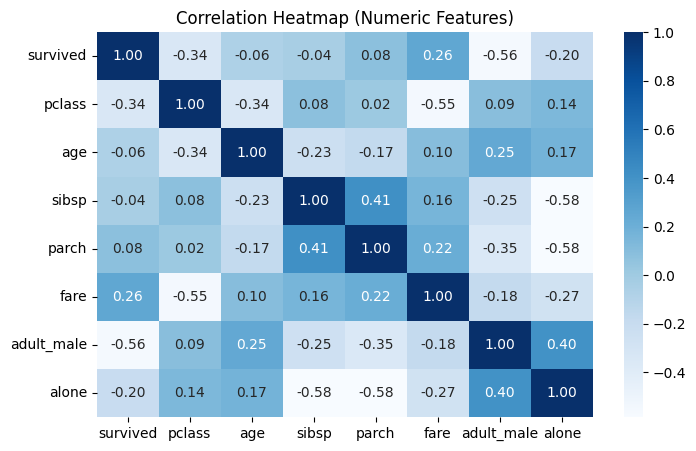

In [12]:
# 4. Correlation Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [13]:
df.to_csv('/content/titanic_cleaned.csv', index=False)
